In [74]:
import pandas as pd
df = pd.read_csv("train.csv")

In [75]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [76]:
#DAtaframe of microaggressive tweets
df1 = df[df["label"] == 1]

In [77]:
df1

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,31948,1,@user @user you don't have the balls to hashta...
31948,31949,1,"makes you ask yourself, who am i? then am i a..."


In [78]:
#Importing libraries for data cleaning
import re
import nltk
from nltk.corpus import stopwords

In [83]:
def clean_tweet_words(tweet):
    alpha_only = re.sub("[^a-zA-Z]",' ',tweet) #"[^a-zA-Z]" this regex will remove any non-alphabetical char as they are not significant
    words = alpha_only.lower().split()
    stop = stopwords.words('english')
    #from the dataframe we can see 'user' word is quite common in the tweets, which is basically used for tagging someone in the tweet
    #so I will be removing that
    stop.append('user')
    stop.append('amp')
    
    sig_words = [word for word in words if not word in stop]
    return(" ".join(sig_words))

In [84]:
# creating a clean_tweet column and adding it to the dataframe
df['clean_tweet']  = df['tweet'].apply(lambda tweet: clean_tweet_words(tweet))

df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz youuu
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised calgary wso condemns act


In [85]:
#drop tweet and id columns
df.drop(['tweet',"id"],axis=1,inplace=True)

In [86]:
df

,label,clean_tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
...,...,...
31957,0,ate isz youuu
31958,0,see nina turner airwaves trying wrap mantle ge...
31959,0,listening sad songs monday morning otw work sad
31960,1,sikh temple vandalised calgary wso condemns act


In [87]:
dfma = df[df["label"] == 1]

In [88]:
dfnma = df[df["label"] == 0]

In [89]:
dfma

,label,clean_tweet
13,1,cnn calls michigan middle school build wall ch...
14,1,comment australia opkillingbay seashepherd hel...
17,1,retweet agree
23,1,lumpy says prove lumpy
34,1,unbelievable st century need something like ne...
...,...,...
31934,1,lady banned kentucky mall jcpenny kentucky
31946,1,omfg offended mailbox proud mailboxpride liber...
31947,1,balls hashtag say weasel away lumpy tony dipshit
31948,1,makes ask anybody god oh thank god


In [90]:
dfnma

,label,clean_tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
...,...,...
31956,0,fishing tomorrow carnt wait first time years
31957,0,ate isz youuu
31958,0,see nina turner airwaves trying wrap mantle ge...
31959,0,listening sad songs monday morning otw work sad


In [26]:
mawords = (str(dfma['clean_tweet'].tolist()))
nmawords = (str(dfnma['clean_tweet'].tolist()))

In [91]:
mawords

"['cnn calls michigan middle school build wall chant tcot', 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins', 'retweet agree', 'lumpy says prove lumpy', 'unbelievable st century need something like neverump xenophobia', 'lets fight love peace', 'white establishment blk folx running around loving promoting greatness', 'hey white people call people white race identity med', 'altright uses amp insecurity lure men whitesupremacy', 'interested linguistics address race amp racism power raciolinguistics brings', 'mocked obama black brexit', 'people protesting trump republican trump fuhered amp', 'yes call michelleobama gorilla racists long thought black people bet', 'smaller hands show barry probably lied knicks game sucked golf', 'point one finger millions pointed right back jewishsupremacist', 'might libtard libtard sjw liberal politics', 'take trash america voted hate voted voted vot', 'hold open door woman woman nice thing even try deny', 'man ran gov

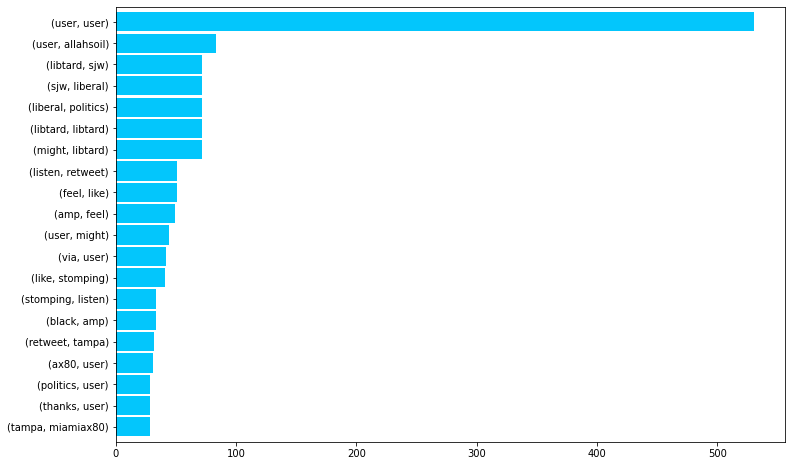

In [28]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
bigrams_series.sort_values().plot.barh(color='#03c6fc', width=.9, figsize=(12, 8))
plt.savefig("bigrams_series.jpg",dpi=150)

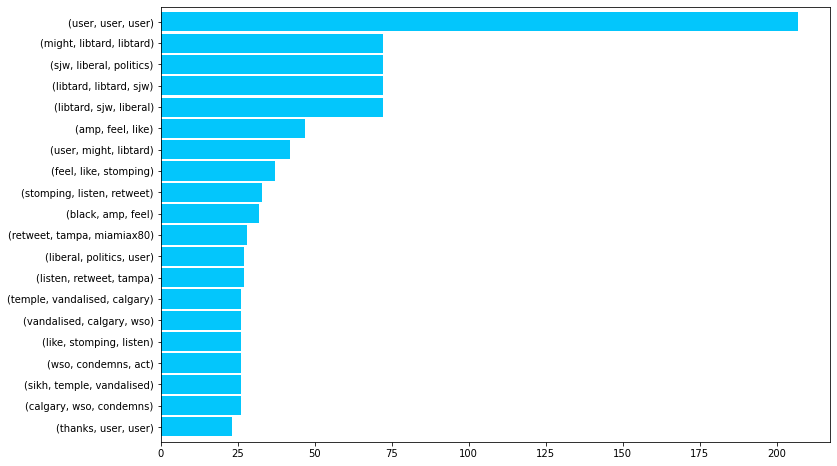

In [29]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]
trigrams_series.sort_values().plot.barh(color='#03c6fc', width=.9, figsize=(12, 8))
plt.savefig("trigrams_series.jpg",dpi=150)

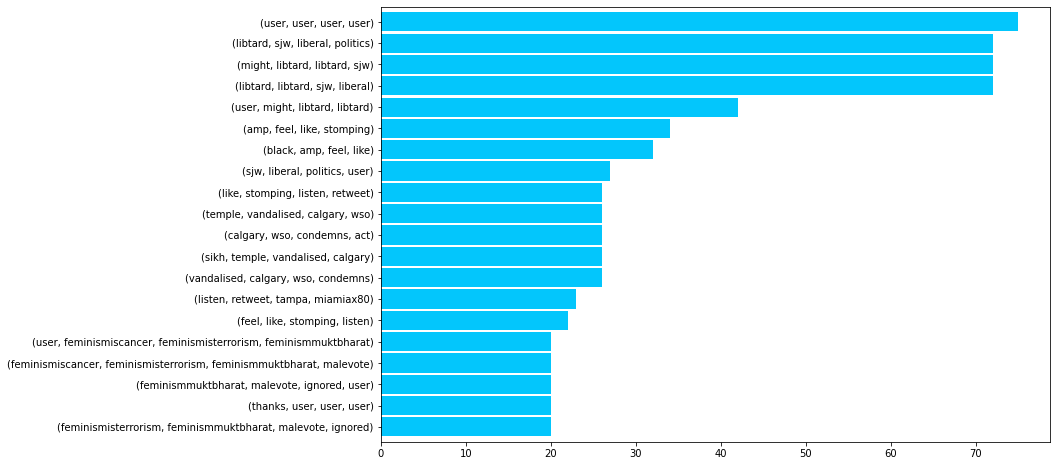

In [30]:
quadgrams_series = (pd.Series(nltk.ngrams(words, 4)).value_counts())[:20]
quadgrams_series.sort_values().plot.barh(color='#03c6fc', width=.9, figsize=(12, 8))
plt.savefig("quadgrams_series.jpg",dpi=150)

In [31]:
# text of racist/sexist tweets
text =" ".join(tweet for tweet in df1.tweet)

In [ ]:
text

In [97]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stop_words = ['amp'] + list(STOPWORDS)
word_cloud = WordCloud(stopwords = stop_words,collocations = False, background_color = 'white').generate(mawords)

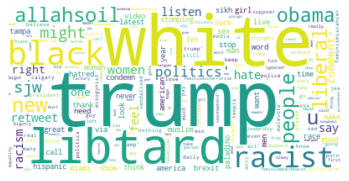

In [98]:
import matplotlib.pyplot as plt
#plt.figure(dpi=100)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordclouds.jpg",dpi=100)
plt.show()
#plt.savefig("cloudword2.png",dpi=600)

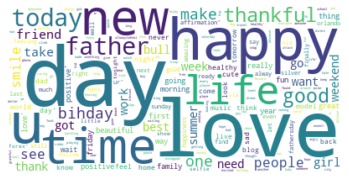

In [100]:
from wordcloud import STOPWORDS
stop_words = ['amp'] + list(STOPWORDS)
word_cloud = WordCloud(stopwords = stop_words,collocations = False, background_color = 'white').generate(nmawords)

#plt.figure(dpi=100)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordclouds.jpg",dpi=100)
plt.show()
#plt.savefig("cloudword2.png",dpi=600)

In [101]:
#Adding a column to show label Name of each tweet
df.loc[(df.label == 0),'class'] = 'Non microaggressive'
df.loc[(df.label == 1),'class'] = 'microaggressive'


In [102]:
df

,label,clean_tweet,class
0,0,father dysfunctional selfish drags kids dysfun...,Non microaggressive
1,0,thanks lyft credit use cause offer wheelchair ...,Non microaggressive
2,0,bihday majesty,Non microaggressive
3,0,model love u take u time ur,Non microaggressive
4,0,factsguide society motivation,Non microaggressive
...,...,...,...
31957,0,ate isz youuu,Non microaggressive
31958,0,see nina turner airwaves trying wrap mantle ge...,Non microaggressive
31959,0,listening sad songs monday morning otw work sad,Non microaggressive
31960,1,sikh temple vandalised calgary wso condemns act,microaggressive


<AxesSubplot:>

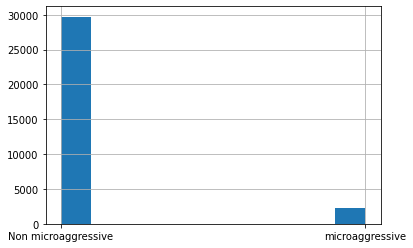

In [103]:
# label distribution
df['class'].hist()

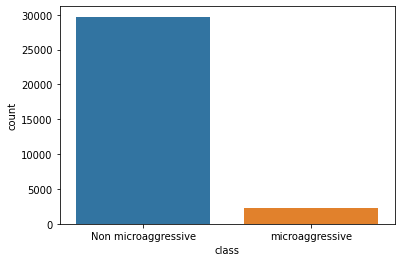

In [104]:
import seaborn as sns
sns.countplot(x=df["class"], data=df)
plt.savefig("countplot.jpg",dpi=100)

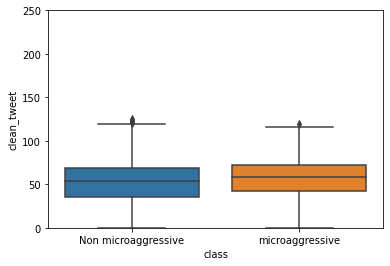

In [108]:
import matplotlib.pyplot as plt
plt.ylim(0, 250)
sns.boxplot(x=df["class"],y=df["clean_tweet"].str.len(), data=df)
plt.savefig("boxplot.jpg",dpi=100)